# Assignment for primetrade.ai DS internship 

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [203]:
# reading Bitcoin Market Sentiment Dataset 
bitcoin_sentiment = pd.read_csv('fear_greed_index.csv')

In [204]:
#reading Historical Trader Data from Hyperliquid
historical = pd.read_csv('historical_data.csv')

## Cleaning and Processing both Datasets 

* Looking for null, duplicated values to treat them


In [205]:
bitcoin_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [206]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [207]:
bitcoin_sentiment.duplicated().sum()

np.int64(0)

In [208]:
historical.duplicated().sum()

np.int64(0)

In [209]:
bitcoin_sentiment.head(2)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02


In [210]:
historical.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12


### So, there are no null and duplicated values in both of these datasets.
### Now i will first convert date and Timestamp IST columns from both dataset to a datetime dtype 
### For now, i am ignoring the timestamp columns from both dataset as i would like to work with the IST 

In [211]:
bitcoin_sentiment['date'] = pd.to_datetime(bitcoin_sentiment['date'])

In [212]:
bitcoin_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [213]:
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'],format='%d-%m-%Y %H:%M')

In [214]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

### After researching about these datasets and their domain knowledge i'll be dropping off some columns as they wont be useful in EDA 
### Dropping Columns:
* `Transaction Hash`
* `Order ID`
* `Trade ID`
* `Crossed`

In [215]:
historical = historical.drop(columns=['Transaction Hash','Order ID','Trade ID','Crossed'])

In [216]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             211224 non-null  object        
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  object        
 6   Timestamp IST    211224 non-null  datetime64[ns]
 7   Start Position   211224 non-null  float64       
 8   Direction        211224 non-null  object        
 9   Closed PnL       211224 non-null  float64       
 10  Fee              211224 non-null  float64       
 11  Timestamp        211224 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 19.3+ MB


### Changing the timestamp columbns in both dataset to proper format (they are UNIX timestamps)

In [217]:
bitcoin_sentiment['timestamp'] = pd.to_datetime(bitcoin_sentiment['timestamp'],unit='s')

In [218]:
bitcoin_sentiment

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,2025-04-28 05:30:00,54,Neutral,2025-04-28
2640,2025-04-29 05:30:00,60,Greed,2025-04-29
2641,2025-04-30 05:30:00,56,Greed,2025-04-30
2642,2025-05-01 05:30:00,53,Neutral,2025-05-01


In [219]:
historical['Timestamp'] = pd.to_datetime(historical['Timestamp'],unit='ms')
historical.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Fee,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0.345404,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0.005600,2024-10-27 03:33:20


## Dataset Summary:

### Fear/Greed Index Dataset (bitcoin_senti):
* `timestamp`: different timestamp version for other GMT times
* `value`: Numerical fear/greed index (0-100 scale)
* `classification`: Sentiment label
* `date`: Datetime

### Historical Trader Data (historical):
* `Account`: Unique identifier for trader
* `Coin`: Crypto Asset traded
* `Execution Price`: Price at which trade was executed
* `Size Tokens`: Quantity of tokens traded
* `Size USD`: USD value of trade
* `Side`: Trade Sides: BUY or SELL
* `Timestamp IST`: Local datetime of trade (IST)
* `Start Position`: Trader's postion (tokens or USD) before this trade
* `Direction`: Trader's net market view (Buy/Sell/Close/Flip etc.)
* `Closed PnL`: Realized profit or loss from the trade
* `Fee`: Trading fee deducted for execution
* `Timestamp`: UTC timestamp for other timezones

## Univariate Analysis on Both Datasets: 

### 1. Fear/Greed Index Dataset 

In [220]:
bitcoin_sentiment.describe()

,timestamp,value,date
count,2644,2644.000000,2644
mean,2021-09-17 17:14:45.022693120,46.981089,2021-09-17 11:44:45.022692864
min,2018-02-01 05:30:00,5.000000,2018-02-01 00:00:00
25%,2019-11-26 23:30:00,28.000000,2019-11-26 18:00:00
50%,2021-09-17 17:30:00,46.000000,2021-09-17 12:00:00
75%,2023-07-10 11:30:00,66.000000,2023-07-10 06:00:00
max,2025-05-02 05:30:00,95.000000,2025-05-02 00:00:00
std,NaN,21.827680,NaN


In [221]:
sns.set(style='whitegrid',context='talk',palette='Set2')
plt.rcParams['figure.figsize'] = (12, 6)

### 2. Historical Trade Dataset 

In [222]:
historical.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Fee,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0.345404,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0.005600,2024-10-27 03:33:20


`Categorical`: Account, Coin, Side, Direction


`Numerical`: Execution Price, Size Tokens, Size USD, Timestamp IST, Start Position, Closed PnL, Fee

#### Univariate Analysis on Numerical Columns 

In [223]:
historical.describe()

,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Fee,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,211224.000000,211224
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,1.163967,2025-01-24 18:44:50.421542912
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,-1.175712,2023-03-28 10:40:00
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,0.016121,2025-02-19 21:20:00
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,0.089578,2025-02-19 21:20:00
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,0.393811,2025-02-19 21:20:00
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,837.471593,2025-06-15 15:06:40
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,6.758854,NaN


<Axes: ylabel='Frequency'>

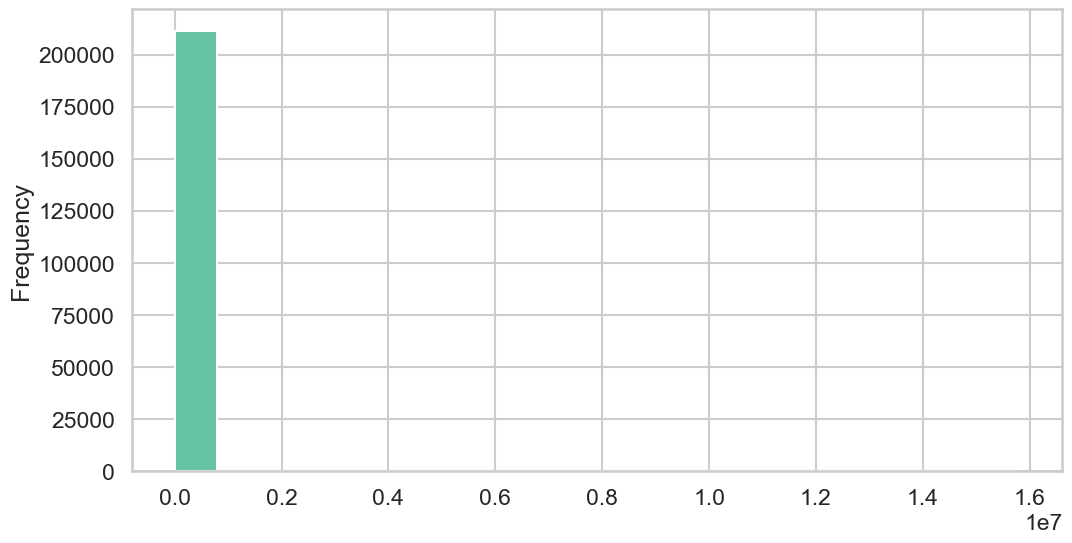

In [224]:
historical['Size Tokens'].plot(kind='hist',bins=20)

<Axes: >

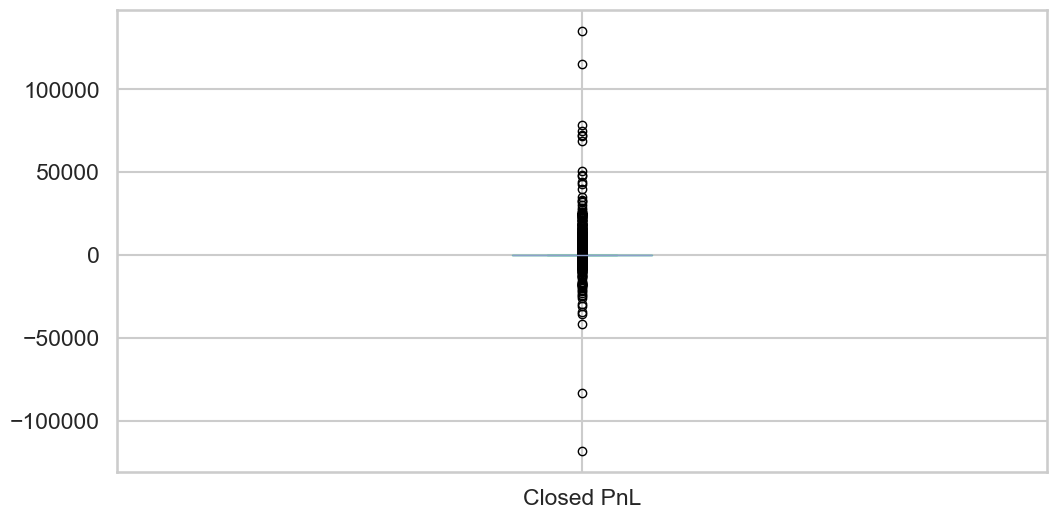

In [225]:
historical['Closed PnL'].plot(kind='box')

In [226]:
historical.corr(numeric_only=True)

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Fee
Execution Price,1.000000,-0.017185,0.189855,0.017241,-0.006505,0.225265
Size Tokens,-0.017185,1.000000,0.013310,0.044660,0.005068,0.006710
Size USD,0.189855,0.013310,1.000000,0.007787,0.123589,0.745939
Start Position,0.017241,0.044660,0.007787,1.000000,0.004066,0.010559
Closed PnL,-0.006505,0.005068,0.123589,0.004066,1.000000,0.084020
Fee,0.225265,0.006710,0.745939,0.010559,0.084020,1.000000


#### Merging two datasets 

In [227]:
historical['date'] = historical['Timestamp IST'].dt.date

In [228]:
historical['date'] = pd.to_datetime(historical['date'])

In [229]:
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             211224 non-null  object        
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  object        
 6   Timestamp IST    211224 non-null  datetime64[ns]
 7   Start Position   211224 non-null  float64       
 8   Direction        211224 non-null  object        
 9   Closed PnL       211224 non-null  float64       
 10  Fee              211224 non-null  float64       
 11  Timestamp        211224 non-null  datetime64[ns]
 12  date             211224 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(6), object(4)
memory usage: 20.9+ MB


In [230]:
merged = historical.merge(bitcoin_sentiment[['date','classification','value']],on='date',how='left')

In [231]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211224 non-null  object        
 1   Coin             211224 non-null  object        
 2   Execution Price  211224 non-null  float64       
 3   Size Tokens      211224 non-null  float64       
 4   Size USD         211224 non-null  float64       
 5   Side             211224 non-null  object        
 6   Timestamp IST    211224 non-null  datetime64[ns]
 7   Start Position   211224 non-null  float64       
 8   Direction        211224 non-null  object        
 9   Closed PnL       211224 non-null  float64       
 10  Fee              211224 non-null  float64       
 11  Timestamp        211224 non-null  datetime64[ns]
 12  date             211224 non-null  datetime64[ns]
 13  classification   211218 non-null  object        
 14  value            211

In [232]:
#Dropping null rows from classification and value colummns 
merged.dropna(subset=['classification','value'],inplace=True)

In [233]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Account          211218 non-null  object        
 1   Coin             211218 non-null  object        
 2   Execution Price  211218 non-null  float64       
 3   Size Tokens      211218 non-null  float64       
 4   Size USD         211218 non-null  float64       
 5   Side             211218 non-null  object        
 6   Timestamp IST    211218 non-null  datetime64[ns]
 7   Start Position   211218 non-null  float64       
 8   Direction        211218 non-null  object        
 9   Closed PnL       211218 non-null  float64       
 10  Fee              211218 non-null  float64       
 11  Timestamp        211218 non-null  datetime64[ns]
 12  date             211218 non-null  datetime64[ns]
 13  classification   211218 non-null  object        
 14  value            211218 n

In [234]:
merged.isnull().sum()

Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Timestamp IST      0
Start Position     0
Direction          0
Closed PnL         0
Fee                0
Timestamp          0
date               0
classification     0
value              0
dtype: int64

## `Objective`: Explore the relationship between market sentiment (fear/greed) and trader performance, uncover hidden patterns and deliver insights that can deliver insights that can drive smarter trading strategies 

In [235]:
merged[merged['value'] < 25]['classification'].value_counts()

classification
Extreme Fear    21400
Name: count, dtype: int64

In [236]:
merged[(merged['value'] > 25) & (merged['value'] < 49)]['classification'].value_counts()

classification
Fear       51873
Neutral    16970
Name: count, dtype: int64

In [237]:
merged[(merged['value'] > 50) & (merged['value'] < 74)]['classification'].value_counts()

classification
Greed      44192
Neutral     6025
Name: count, dtype: int64

In [238]:
merged[(merged['value'] > 74) & (merged['value'] < 100)]['classification'].value_counts()

classification
Extreme Greed    39992
Name: count, dtype: int64

In [239]:
merged[merged['classification'] == 'Neutral']['value'].max()

54.0

In [240]:
merged[(merged['value'] > 44) & (merged['value'] < 55)]['classification'].value_counts()

classification
Neutral    37686
Name: count, dtype: int64

In [241]:
merged[(merged['value'] > 24) & (merged['value'] < 45)]['classification'].value_counts()

classification
Fear    61837
Name: count, dtype: int64

# Domain Knowledge:

1. Fear and Greed Index Dataset
   * The fear and greed index is a sentiment indicator used to gauge the emotional state of the market. It was mainly developed for stock markets, it's also used in crypto markets to reflect crowd choices/decisions.
  
### Value Ranges and their Sentiment: 

* `0-24` : `Extreme Fear`
* `24-45` : `Fear`
* `45-55` : `Neutral`
* `55-75` : `Greed`
* `75-100` : `Extreme Greed`

2. Historical Trader Data from Hyperliquid
   * This dataset represents individual trades performed by traders on a crypto trading platform.
  
### Analysis Questions:
1. Find how trading behavior or performance changes depending on the market's emotional state?
2. Do traders make better decisions during Fear or Greed?
3. Are some traders consistently profitable regardless of sentiment?
4. What kind of trades are more successful under different sentimental conditions?

## EDA

### Univariate analysis on categorical columns 

## 1. Market Sentiment Distribution

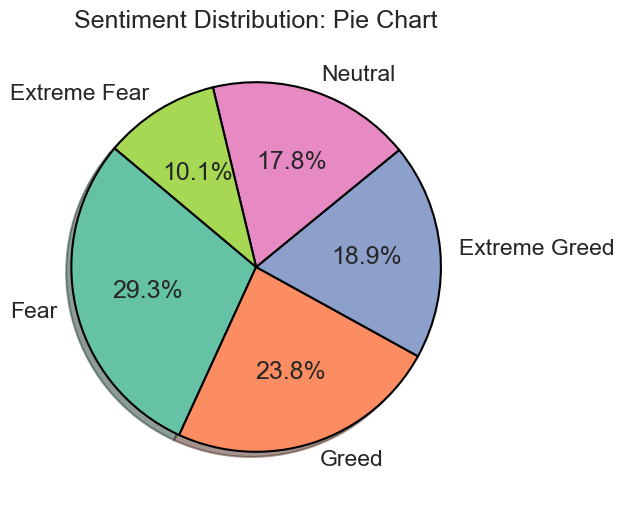

In [242]:
merged['classification'].value_counts().plot(
    kind='pie',
    autopct = '%0.1f%%',
    shadow=True,
    startangle=140,
    wedgeprops = {'edgecolor':'black'}
)
plt.title('Sentiment Distribution: Pie Chart')
plt.ylabel("")
plt.show()

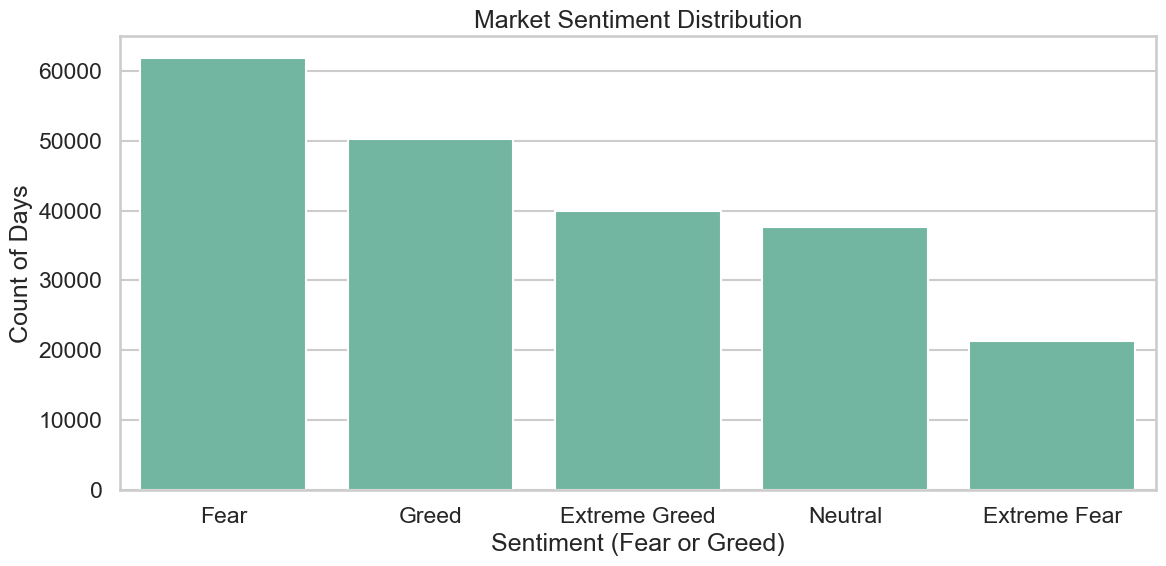

In [243]:
plt.figure()
sns.countplot(data=merged, x='classification', order=merged['classification'].value_counts().index)
plt.title('Market Sentiment Distribution')
plt.xlabel('Sentiment (Fear or Greed)')
plt.ylabel('Count of Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### This bar chart and pie chart visualizes the frequency of different market sentiment categories across the dataset.

* How often does each market sentiment occur?
* Is the market more frequently fearful or greedy?
#### Insights:

* Fear is the most common sentiment
* Extreme greed and greed are also fequent but less than Fear
* Extreme Fear occurs the least
* Neutral sentiment is relatively moderate in occurence

#### The market tends to lean towards fearful sentiment, which suggests investor caution. This might imply more conservative trading behavior on average.

## Average Closed PnL Over Time 

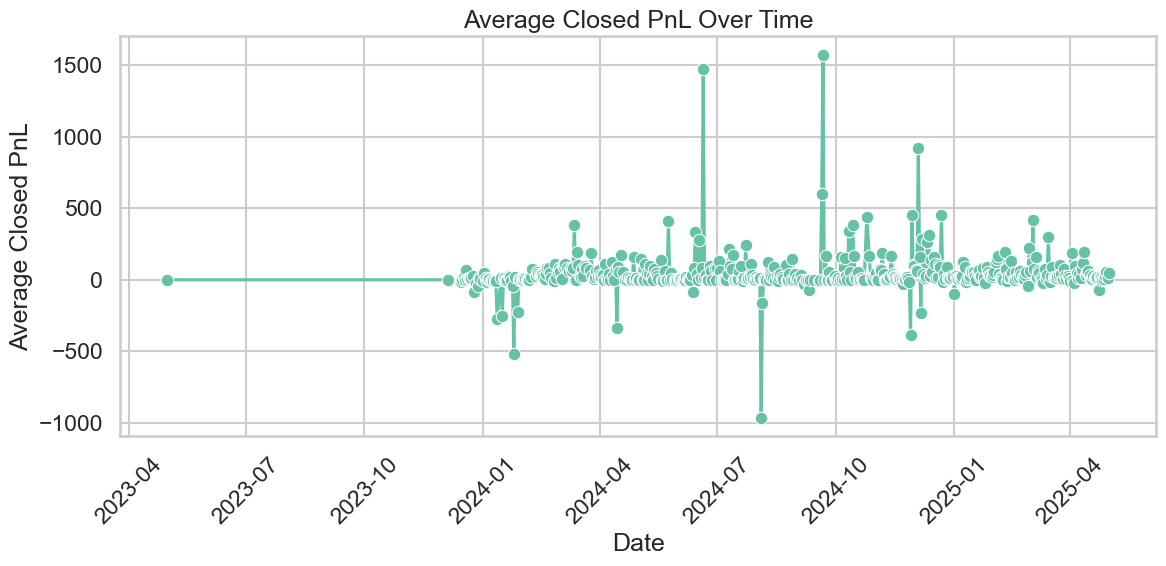

In [244]:
daily_avg_pnl = merged.groupby('date')['Closed PnL'].mean().reset_index()

plt.figure()
sns.lineplot(data=daily_avg_pnl,x='date',y='Closed PnL',marker='o')
plt.title('Average Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### This scatter plot with vertical lines displays average closed profit and loss changes over time

* How is the average closed PnL trending over time?
* Are there specific periods where PnL significantly spiked or dropped?

#### Insights:

* Majority of points cluster around zero, suggesting low average profit/loss.
* Spikes and Drops:
  * Large positive spikes around July and October (2024), indicates highly profitable trades
  * Sharpe negative spikes show substantial losses
* Distribution is fairly symmetrical, meaning gains and losses are balanced over time with no strong trend.

#### Traders have a balanced performance with occasional outliers. Investigating these spike dates could reveal critical market events that affected PnL.

## Closed PnL Distribution by Market Sentiment (Boxplot)

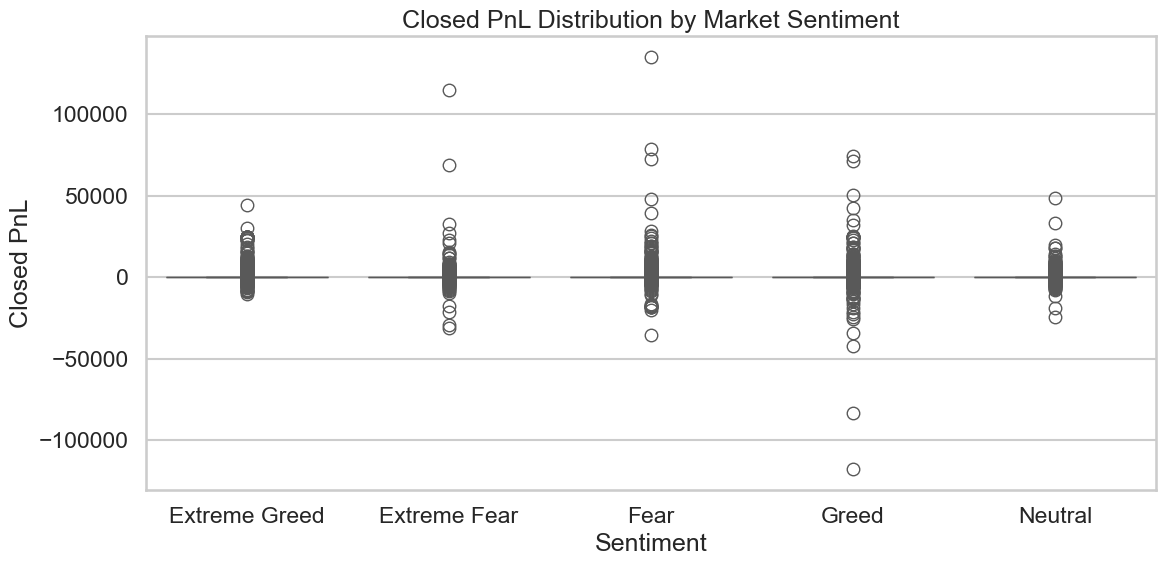

In [245]:
plt.figure()
sns.boxplot(data=merged,x='classification',y='Closed PnL')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

### This plot shows distribution of closed PnL for trades under each market sentiment.

* How does market sentiment impact the profitability of trades?
* Do traders earn more under Greed or Fear conditions ?
* Is there more risk or volatility during Extreme sentiments ?

#### Insights: 
* Wide Distribution among each sentimentL:
  * Each sentiment shows a wide range from -100,000 to +120,000 indicating both high gains and large losses among all sentiments.
* Fear has the highest outlier:
  * There is atleast one very high positive point suggesting some traders make big profits when others are cautious.
* Greed and Extreme Greed Show positive outliers:
  * High profits are also seen in greed and extreme greed, though majority is clustered around 0.
* Extreme Fear shows negative spikes:
  * It has notable large losses, meaning higher downside risk in panic markets.
* Neutral Sentiment is Balanced (safe):
  * Its cluster is tighter and closer to 0 with few extreme points, means that trades are more stable and less volatile under neutral sentiment.

### Interpretation:
* High risk - high reward trading happens during Extreme sentiments.
* Fear offers biggest opportunities for profit but extreme fear can lead to huge losses.
* Greed and extreme greed also lead to profitable trades, but not like fear does.
* Neutral sentiment is ideal for low-volatility and risk-adverse strategies.


### Strategic Implications:
* Traders might exploit Fear for high returns - but must face risk and prevent extreme fear.
* Risk averse traders should stick to neutral sentiment

## Trade Side (BUY/SELL) Count Plot by Sentiment 

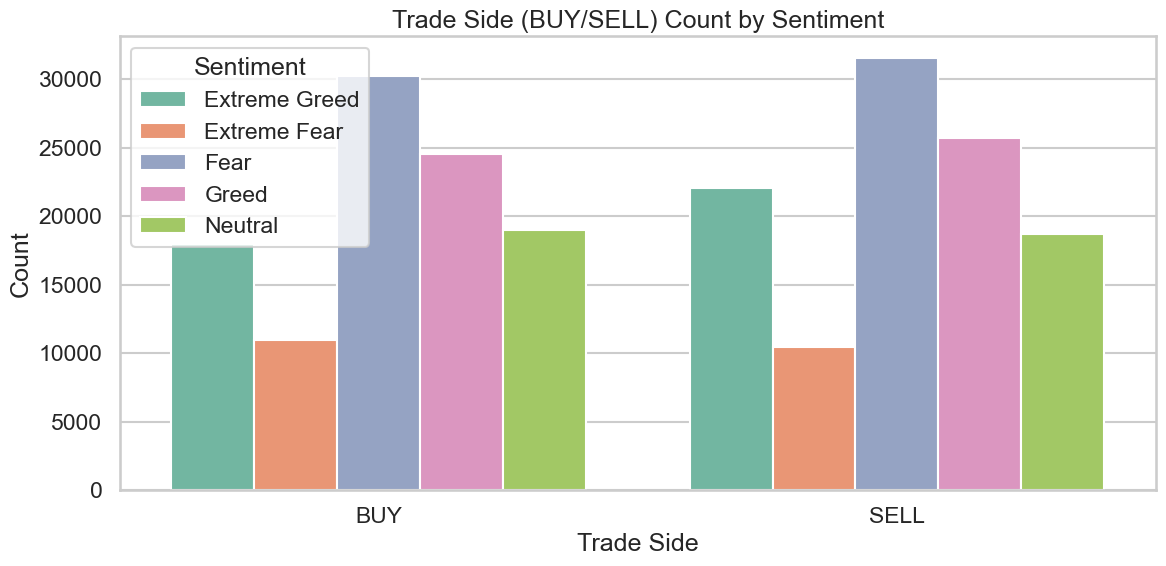

In [246]:
plt.figure()
sns.countplot(data=merged,x='Side',hue='classification')
plt.title('Trade Side (BUY/SELL) Count by Sentiment')
plt.xlabel('Trade Side')
plt.ylabel('Count')
plt.legend(title='Sentiment',loc='best')
plt.tight_layout()
plt.show()

### Just like in Market Sentiment Distribution, here aswell we can see that Fear and Greed are the majority of the sentiments for both buy and sell compared to extreme fear, extreme greed and neutral.

* Under Fear there are more SELL trades than BUY
* Under Greed as well its the same.
* For extreme fear , extreme greed and neutral sentiments both sides (buy/sell) are relatively closer.
* Extreme sentiments have lowest trades for both sides.
* Neutral is moderate.

## Win Rate by Sentiment

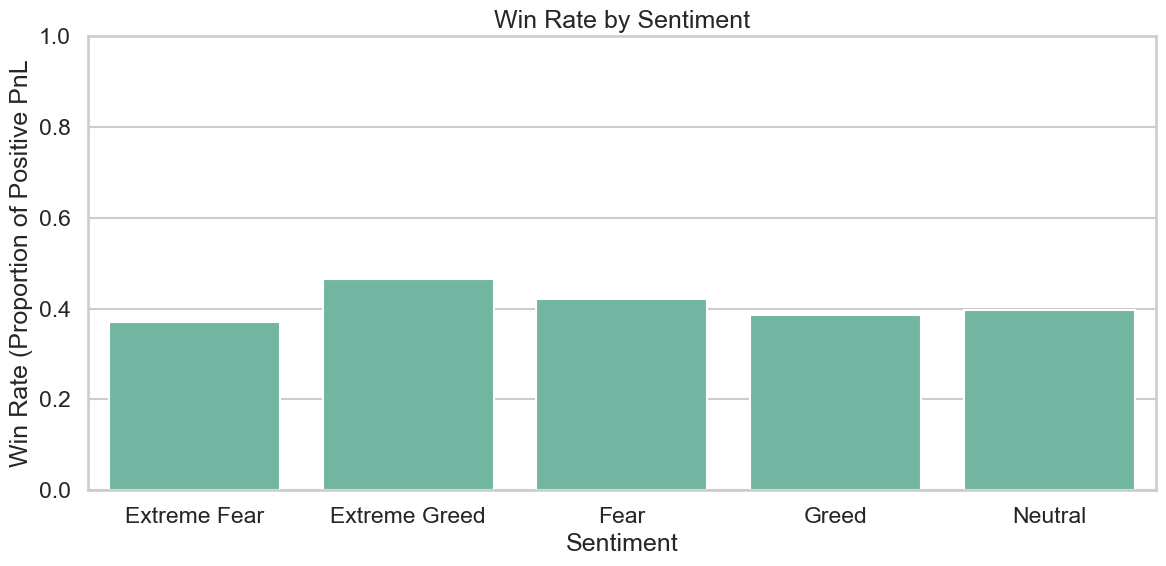

In [247]:
merged['is_win'] = merged['Closed PnL'] > 0
win_rate = merged.groupby('classification')['is_win'].mean().reset_index()

plt.figure()
sns.barplot(data=win_rate,x='classification',y='is_win')
plt.title('Win Rate by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Win Rate (Proportion of Positive PnL')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

### This bar chart shows the percentage of winning trades under each market sentiment category.

* How often do traders win under different market sentiments?
* Does sentiment influence the success rate of trades - not just profit size but frequency?

### Insights:

* Extreme Greed and Fear has the highest win rate with extreme greed showing slightly higher win rate.
* Extreme fear and greed has lowest win rate.
* Neutral has a moderate win rate.
* Higher win rates during extreme greed and fear shows that original trading practices might be more effective 

## Trade Size (Tokens) Distriubtion by Sentiment

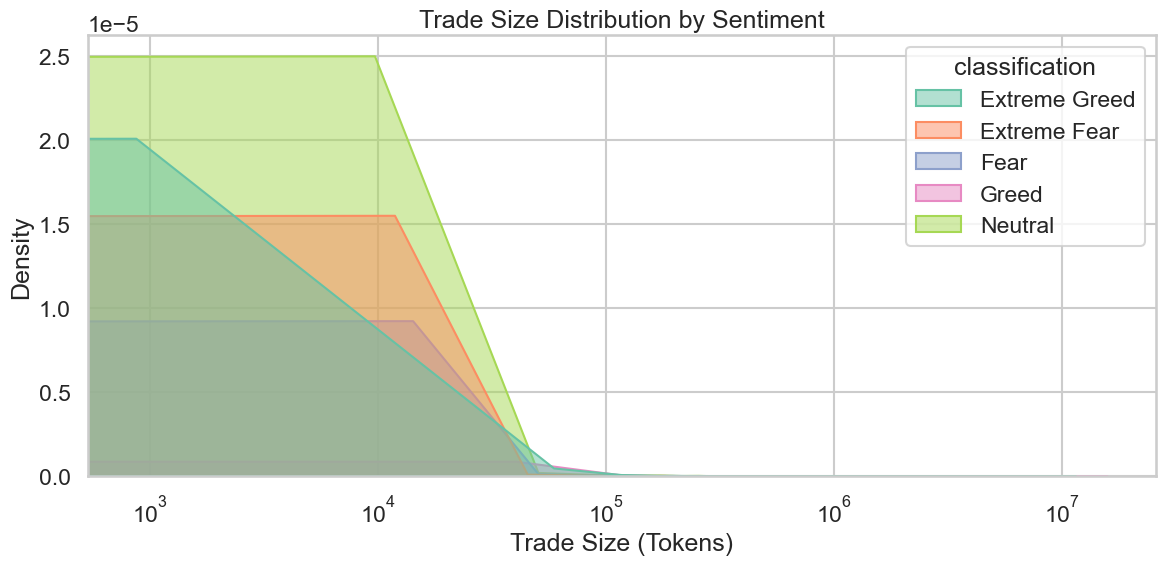

In [248]:
plt.figure()
sns.kdeplot(data=merged,x='Size Tokens',hue='classification',fill=True,common_norm=False,alpha=0.5)
plt.title('Trade Size Distribution by Sentiment')
plt.xlabel('Trade Size (Tokens)')
plt.xscale('log')
plt.tight_layout()
plt.show()

### This is a kdeplot representing the distribution of Size Tokens (Trade Size) by each Sentiment. Log scale is used on the x axis which helps to visualizae distribution across wide range of values.

### Insights: 

* Neutral (light green) has the highest density for smaller trade sizes, suggesting that most trades under neutral sentiment are small.
* Extreme Greed (teal) and Extreme Fear (orange) show similar behavior, with noticeable density in smaller trades but tapering off more quickly than Neutral.
* Fear (blue) and Greed (pink) appear with slightly lower densities in general, and their curves suggest they have less frequent small trades than Neutral.
* As trade size increases, all distributions rapidly drop off, indicating larger trades are rare, regardless of sentiment.
* There's significant overlap which implies that small trades are common across all sentiments, where neutral being the dominant sentiment.
* Neutral leads to more frequent small trades (as the risk is low).
* Extreme sentiments still show small trades but slightly less dense.
* Large trades are relatviely rare

## Trade Size (USD) Distriubtion by Sentiment

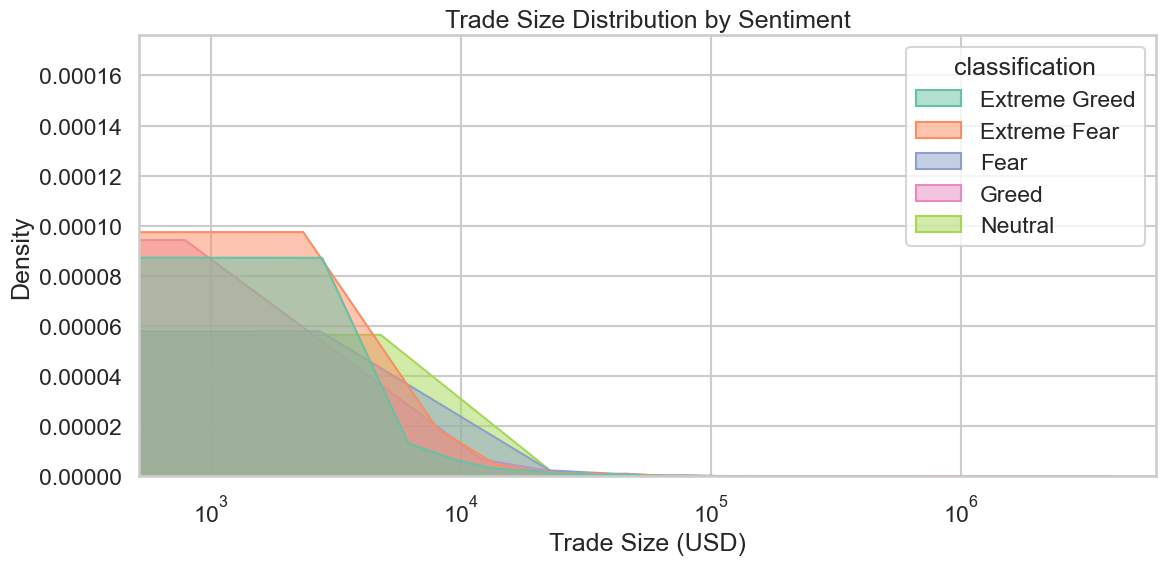

In [249]:
plt.figure()
sns.kdeplot(data=merged,x='Size USD',hue='classification',fill=True,common_norm=False,alpha=0.5)
plt.title('Trade Size Distribution by Sentiment')
plt.xlabel('Trade Size (USD)')
plt.xscale('log')
plt.tight_layout()
plt.show()

### Same plot but with Size USD column

### Insights: 
* Extreme Fear (orange) has the highest density in the low trade size range, indicating that users classified under extreme fear sentiment tend to execute the most small-sized trades.
* Extreme Greed (greenish-teal) and Fear (blue) follow closely behind, also showing elevated activity in small trades.
*
* Extreme Greed (greenish-teal) anNeutral (lime green) and Greed (pink) have slightly lower density, suggesting slightly fewer small trades in those sentiment conditions.d Fear (blue) follow closely behind, also showing elevated activity in small trades.
* All sentiment categories rapidly drop in density as trade size increases.
* A long tail exists, but with very low densities, large trades are rare across all sentiments.
* However, Neutral sentiment shows a slightly longer and smoother tail, hinting at a broader spread of trade sizes compared to other sentiments.
* Extreme sentiments (Fear/Greed) appear to correlate with higher densities of small trades, possibly reflecting uncertainty or reactive behavior.
* Extreme Fear leads to the most cautious trading behavior — frequent, small trades possibly to minimize exposure.
* Neutral sentiment seems to allow for more diversity in trade sizes, possibly reflecting confidence or lack of urgency.
* Large trades are rare, and none of the sentiment categories show significant density beyond ~10⁵ tokens.

In [250]:
merged['day_of_week'] = merged['date'].dt.day_name()
heatmap_data = merged.groupby(['classification','day_of_week'])['Closed PnL'].mean().unstack()

## Average Closed PnL by Day of Week and Market Sentiment (Heatmap)

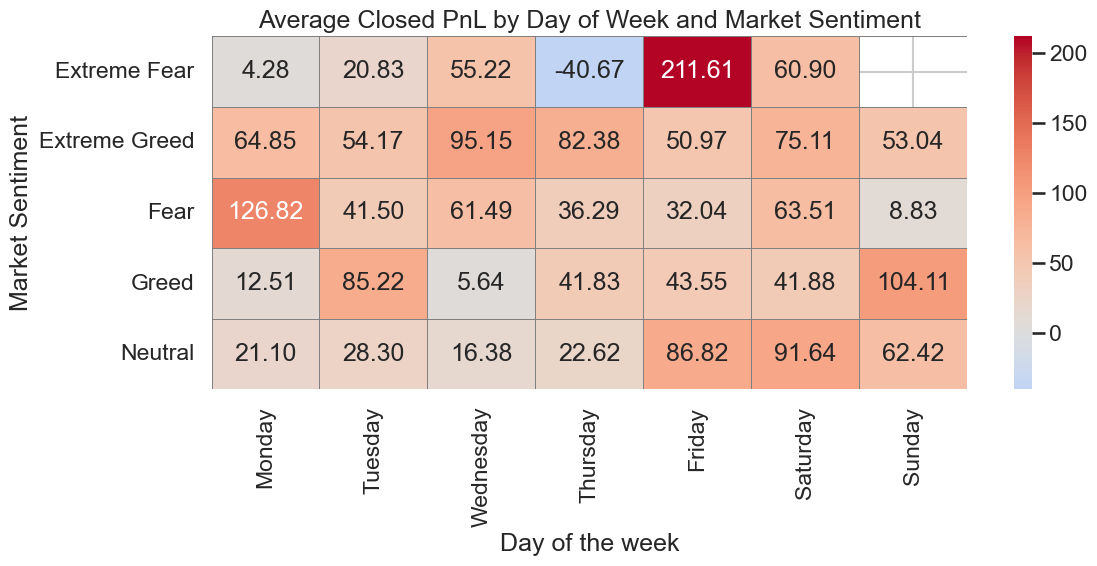

In [251]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[days]

plt.figure()
sns.heatmap(heatmap_data,annot=True,fmt='.2f',cmap='coolwarm',center=0,linewidth=0.5,linecolor='gray')
plt.title('Average Closed PnL by Day of Week and Market Sentiment')
plt.xlabel('Day of the week')
plt.ylabel('Market Sentiment')
plt.tight_layout()
plt.show()

### This heatmap shows the Average closed pnl by day of the week and market sentiment.Each cell represents the average PnL for that specific combination, with color indicating magnitude — red for higher profits, blue for losses, and neutral colors for lower values.

### Observation:
1. Top profift scenarios:
   * Extreme fear on Friday shows the highest average PnL (211.61) - the most profitable condition overall.
   * Fear on Monday (126.82) and greed on sunday (104.11) are also strong.
   * Extreme greed on wednesday (95.15) and Neutral on Saturday (91.64)
2. Loss scenario:
   * Extreme Fear on Thursday stands out with a negative PnL of -40.67, only significant loss in the dataset.
3. Moderate scenarios:
   * Most of the neutral sentiment days show relatviely consistent and moderate PnLs, with Saturday and Friday being particularly strong.
   * Extreme greed tends to be positive throughout, peaking midweek.
4. Low-performance:
   * Greed on wedesday(5.64) and Fear on Sunday(8.83) are much lower in comparision to other sentiments.
   * May suggest less reliable or riskier martket conditions under those combinations.

### Insights:

* Fear-based sentiment can be highly profitable early in the week, especially Monday and Wednesday, potentially due to overreactions or rebound trades.
* Extreme Fear creates volatile scenarios — some days (Friday) yield the highest profits, but others (Thursday) bring losses, implying high-risk/high-reward conditions.
* Greed is more erratic, with a strong Sunday but a very weak Wednesday, indicating potential overconfidence or market corrections.
* Neutral sentiment is safest, offering steady gains without extremes.

In [252]:
merged.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Fee,Timestamp,date,classification,value,is_win,day_of_week
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0.345404,2024-10-27 03:33:20,2024-12-02,Extreme Greed,80.0,False,Monday
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0.005600,2024-10-27 03:33:20,2024-12-02,Extreme Greed,80.0,False,Monday


In [253]:
merged.to_csv('final_merged.csv',)